# Tester for probabilistic regression using zuko

Note that the zuko library (https://github.com/probabilists/zuko/) is also suitable for probabilistic regression. 

In [2]:
#%uv pip install zuko

## DGP

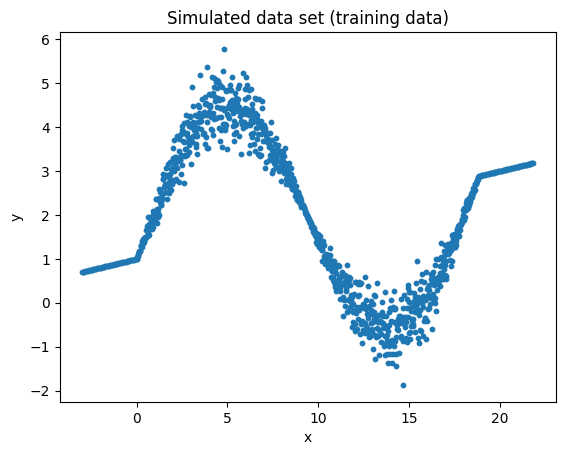

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dgp_1(n):
    np.random.seed(42)
    N = 1000 # number of data points
    x_train = np.random.uniform(-10, 10, (N, 1)).astype(np.float32)
    y_train = (2 * x_train + np.random.normal(0, np.abs(x_train) + 1, (N, 1))).astype(np.float32)
    return x_train.reshape(1,-1), y_train.reshape(1,-1)


def dgp_2(n):
    np.random.seed(32)
    x = np.linspace(0,1*2*np.pi,n)
    y1 = 3*np.sin(x)
    y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
    x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
    y2 = 0.1*x+1
    y=y1+y2
    return x.reshape(-1,1),y.reshape(-1,1)

dgp = dgp_2

x_train, y_train = dgp(1000)
plt.scatter(x_train, y_train, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated data set (training data)')

# Predict the distribution
x_test = np.linspace(-10, 30, 100).reshape(-1, 1)

## Using TabPFN for Probabilistic Regression

In [11]:
# For installation of tabpfn
# %pip install tabpfn

In [4]:
from tabpfn import TabPFNRegressor
reg = TabPFNRegressor()
reg.fit(x_train, y_train)
preds = reg.predict(x_test, output_type="full")

/Users/oli/Documents/GitHub/mldl_htwg/htwg_dl_25/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
preds.keys() #dict_keys(['criterion', 'logits', 'mean', 'median', 'mode', 'quantiles'])
preds['quantiles'] #List of length 9
ql = preds['quantiles'][0]
qu = preds['quantiles'][8]
med = preds['median']

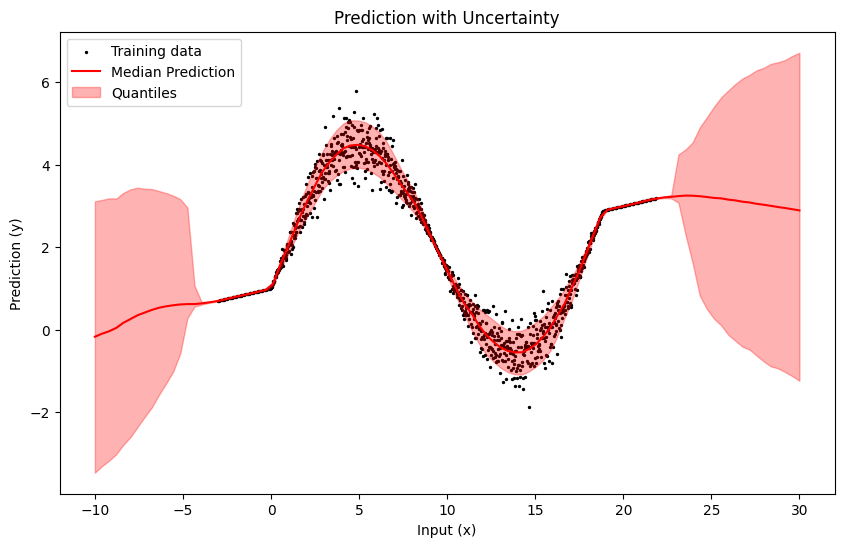

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color="black", label="Training data", s=2)  # Changed 'size' to 's'
plt.plot(x_test, med, color="red", label="Median Prediction")
plt.fill_between(
    x_test.ravel(),
    ql,
    qu,
    color="red",
    alpha=0.3,
    label="Quantiles"
)
plt.legend()
plt.xlabel("Input (x)")
plt.ylabel("Prediction (y)")
plt.title("Prediction with Uncertainty")
plt.show()